<a href="https://colab.research.google.com/github/sakshi2215/Machine_learning/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

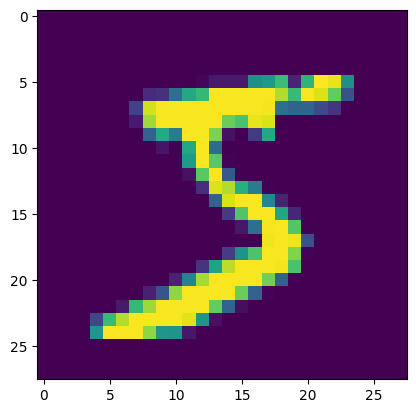

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
X_train =X_train/255
X_test= X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = Sequential()
#Flatten Layer
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
#Define the loss Function We dont have to ohe the categorical
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.1118 - val_accuracy: 0.9748
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.1156 - val_accuracy: 0.9739
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.1393 - val_accuracy: 0.9729
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.1214 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.1197 - val_accuracy: 0.9770
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.1275 - val_accuracy: 0.9745
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.1337 - val_accuracy:

In [31]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
y_pred=y_prob.argmax(axis=1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9774

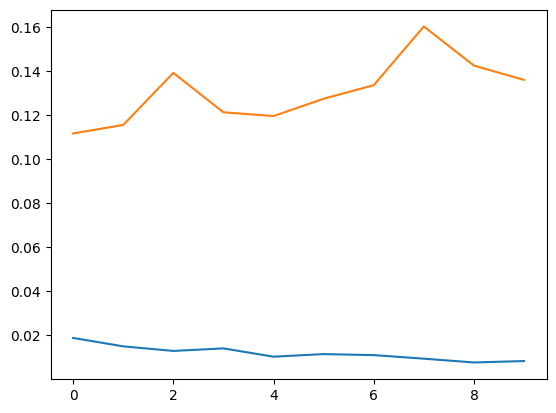

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


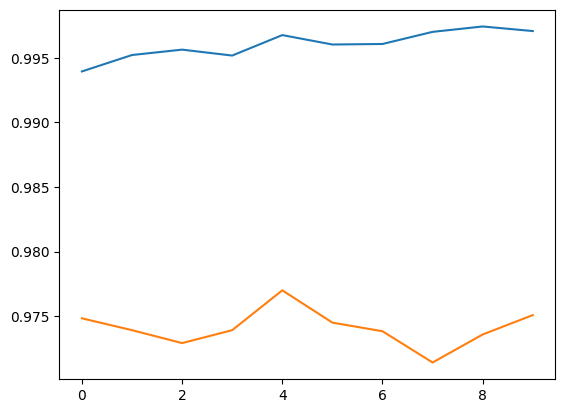

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 60ms/step


array([7])